In [1]:
import numpy as np
import matplotlib.pyplot as plt

from genedata import generater
from genedata import augment
from nonparam import KernalSmooth
from knockoff import LinearInferenceMachine

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 设置全局参数
n = 300
p = 20
k = 3
rou = 0.5
alpha = 0.0

# 生成数据
y,X,U  = generater(n,p,k,rou)
# 对X进行增广
XX = augment(X)

when augumenting X0 is None, so your input should be all X, or only X1 with appling spliding method


In [44]:
#### 把部分线性转化为线性。
#### 然后调用 knockoff 的包，来筛选变量

ksm = KernalSmooth()
g1 = ksm.fitpredict(U,y,U,0.3,"gaussian")
g2 = ksm.fitpredict(U,XX,U,0.3,"gaussian")

knockoffer = LinearInferenceMachine(XX-g2,y-g1,1e-6)
knockoffer.compute_W()

In [43]:
#### 根据特定的 q 来选择一定数量的变量
q = 0.2
n_choose = int(p*q)   # 向下取整
chosen = knockoffer.W >= np.sort(knockoffer.W)[p-n_choose]

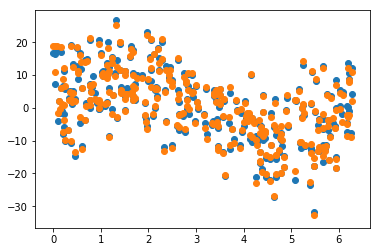

In [46]:
#### 用 knockoff 筛选之后的变量来进行 部分线性模型的预测

from semiparam import WeightFunction
wf = WeightFunction()
wf.fit(X[:,chosen], U, y, 0.3, 0)

linear_hat = np.dot(X[:,chosen],wf.beta)
g_hat = ksm.fitpredict(U,y-linear_hat,U,0.3,"gaussian")

plt.scatter(U,y)
plt.scatter(U,linear_hat+g_hat)
plt.show()